<a href="https://colab.research.google.com/github/Mariolh33/G2_100472188_100429058_P2/blob/main/Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


https://github.com/Mariolh33/G2_100472188_100429058_P2.git

Mario Lafuente Hueso - 100472188

Pablo Martín Muñoz   - 100429058

# 1. Comparación de KMeans e implementación propia


Generación de datos sintéticos para esta primera parte. Para las siguientes secciones se usaran los de verdad.

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs

# Genera datos sintéticos
X, y = make_blobs(
    n_samples= 240,
    n_features=2,
    centers=4,
    cluster_std=0.5,
    random_state=8858
)

print("Primeros 2 registros de X:")
print(X[:5])
print("Primeros 2 registros de y:")
print(y[:10])

Primeros 2 registros de X:
[[-0.12599552 -4.04779288]
 [-4.62684854 -3.94268412]
 [-7.75450411  8.44499733]
 [-4.90518232 -4.62301968]
 [ 0.80373109 -3.49845883]]
Primeros 2 registros de y:
[0 2 1 2 0 0 1 3 1 3]


Implementación y comparacion mediante graficas entre nuestra implementación y la de SKlearn

Kmeans Sklearn:  18.42951774597168
Kmeans propio:  1.5625953674316406


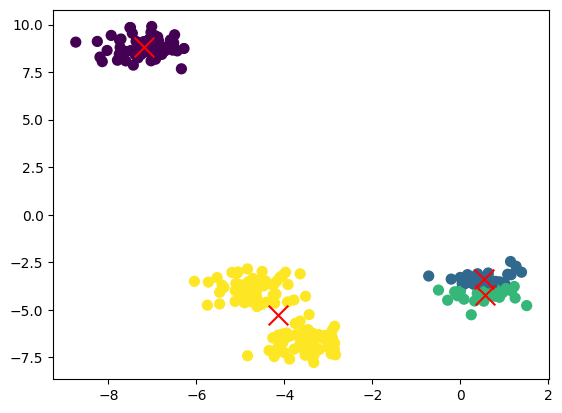

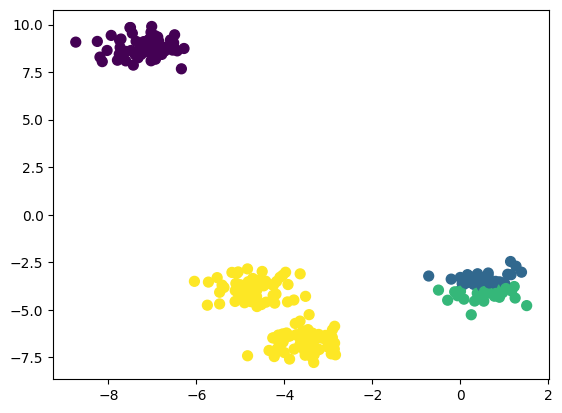

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import time


import numpy as np

class KMeans1:
    def __init__(self, n_clusters, max_iter=300, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state

    def fit_1(self, X):
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape

        # Inicialización de los centroides de manera aleatoria
        centroids_indices = np.random.choice(n_samples, size=self.n_clusters, replace=False)
        self.centroids = X[centroids_indices]

        # Bucle principal del algoritmo KMeans
        for _ in range(self.max_iter):
            # Asignar cada muestra al centroide más cercano
            labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2), axis=1)

            # Actualizar los centroides como la media de las muestras asignadas a cada cluster
            new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])

            # Comprobar si la convergencia ha sido alcanzada (si los centroides han cambiado menos que la tolerancia)
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break

            self.centroids = new_centroids

        # Calcular la inercia
        self.inertia_ = sum(np.min(np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2), axis=1))

        return self



    def predict(self, X):
        distances = np.array([[np.linalg.norm(point - centroid) for centroid in self.centroids] for point in X])
        return np.argmin(distances, axis=1)



kmeans = KMeans(n_clusters=4,init="random",
        n_init=1,
        random_state=8858)
start_time= time.time()
kmeans.fit(X)
end_time=(time.time()-start_time)*1000
print("Kmeans Sklearn: ",end_time)

#predict con el modelo creado
modelo_kmeans = KMeans1(
        n_clusters=4,
        random_state=8858
    )
start_time= time.time()
modelo_kmeans.fit_1(X)
end_time=(time.time()-start_time)*1000
print("Kmeans propio: ",end_time)

prediccion=modelo_kmeans.predict(X)
prediccion2=kmeans.predict(X)

centroids = modelo_kmeans.centroids
plt.scatter(X[:, 0], X[:, 1], c=prediccion, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='red')
plt.show()


plt.scatter(X[:, 0], X[:, 1], c=prediccion2, s=50, cmap='viridis')

plt.show()




Para obtener resultados lo más realistas posible, realizamos varias comparaciones con el algoritmo de SkLearn, variando los centroides iniciales. Inicialmente, sin esta decisión, la solución obtenida por KMeans no coincidía entre nuestra implementación y la de SkLearn, ya que esta última utiliza la inicialización predeterminada de KMeans++. Por esta razón, inicialmente, el algoritmo de SkLearn tardaba considerablemente más que el nuestro. Finalmente, ajustamos el método init a "random" y n_init=1", logrando que ambos algoritmos seleccionaran los mismos centroides. Esta combinación de parámetros es necesaria, dado que inites el hiperparámetro que determina si se inician los centroides de manera aleatoria o utilizando KMeans++, mientras quen_init` controla la cantidad de veces que el algoritmo prueba diferentes conjuntos de centroides.

# 2. Procesado de datos. One-hot-encoding y PCA
Importamos el archivo stars2.csv del repositorio de github

In [ ]:
import pandas as pd

# URL del archivo CSV en GitHub
url = 'https://github.com/Mariolh33/G2_100472188_100429058_P2/raw/main/Stars2.csv'

# Cargar el archivo directamente con pandas
stars2 = pd.read_csv(url, encoding='utf-8')

# Explorar el DataFrame
print("Número de instancias y atributos de la tabla original: ", stars2.shape)

Número de instancias y atributos de la tabla original:  (240, 6)


In [ ]:
stars2

,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Blue,O
237,8829,537493.000000,1423.0000,-10.73,White,A
238,9235,404940.000000,1112.0000,-11.23,White,A


Vamos a ver como son los valores categoricos de nuestro Dataframe


In [ ]:
valores_Color = stars2['Color'].unique()
valores_Spectral_Class = stars2['Spectral_Class'].unique()
#obtenemos todos los diferentes valores para las clases sobre las que vamos a aplicar one-hot-encoding
print(valores_Color)
print("")
print(valores_Spectral_Class)

['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
 'Blue-White']

['M' 'B' 'A' 'F' 'O' 'K' 'G']


Como podemos observar hay valores muy similares, como el caso de "Blue White" o "Blue white" o "Blue-white". Tambien hay "White" y "Whitish" que se han considerado ambos como blanco(White).

Para solucionar los probelmas anteriores se hacer lo sigueinte:
1.   Pasar todos los elementos a minusculas y eliminar espacios extras.
2.   Se van a sustituir elemntos que sean muy similares como los anteriormente mencionados.





In [ ]:
import pandas as pd

# Suponiendo que tienes un DataFrame llamado stars2 con una columna llamada 'color'
# y que tienes la lista de mapeo de colores llamada mapeo_colores

# Creamos el DataFrame de ejemplo stars2


# Eliminar espacios adicionales y convertir a minúsculas
stars2['Color'] = stars2['Color'].str.strip().str.lower()

# Mapear colores similares a una categoría común
mapeo_colores = {

    'blue white': 'blue-white',
    'yellowish white': 'white',
    'whitish': 'white',
    'yellow-white': 'white-yellow',
    'yellowish': 'yellow',
}

stars2['Color'] = stars2['Color'].map(mapeo_colores).fillna(stars2['Color'])

# Obtener los valores únicos simplificados
valores_simplificados = stars2['Color'].unique()

print("Valores simplificados:")
print("")
print(stars2['Color'].unique())


Valores simplificados:

['red' 'blue-white' 'white' 'pale yellow orange' 'blue' 'white-yellow'
 'orange' 'yellow' 'orange-red']


## 2.1 One-Hot encoding
Ajustamos los datos categoricos usando la implementación de sklearn








In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Extraer las columnas categóricas
#categorias = mis_datos[['temperatura', 'color']]
categorias = stars2.select_dtypes(include=['object'])


# Inicializar el codificador
encoder = OneHotEncoder()

# Ajustar y transformar los datos categóricos
onehot_encoded = encoder.fit_transform(categorias)

# Convertir la matriz dispersa a un DataFrame de pandas
onehot_encoded_df = pd.DataFrame(onehot_encoded.toarray(), columns=encoder.get_feature_names_out(categorias.columns))

# Convertir los valores en el DataFrame a enteros
onehot_encoded_df = onehot_encoded_df.astype(int)

# Combinar el DataFrame codificado con las otras columnas
pre_encoded_data_OHE = pd.concat([ stars2, onehot_encoded_df,], axis=1)
pre_encoded_data_OHE=pre_encoded_data_OHE.drop(columns=categorias.columns)



print("\nDataFrame con one-hot encoding:")
print("")




DataFrame con one-hot encoding:



El dataframe con One hot encoding queda asi :

In [ ]:
pre_encoded_data_OHE

,Temperature,L,R,A_M,Color_blue,Color_blue-white,Color_orange,Color_orange-red,Color_pale yellow orange,Color_red,Color_white,Color_white-yellow,Color_yellow,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
236,30839,834042.000000,1194.0000,-10.63,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
237,8829,537493.000000,1423.0000,-10.73,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
238,9235,404940.000000,1112.0000,-11.23,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


## 2.2 Ordinales
Usando Ordinales en vez de One hot encoder. Tambien el de sklearn.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Supongamos que 'stars2' es tu DataFrame existente y quieres codificar las columnas 'Tamaño' y 'Color'
columns_to_encode = categorias.columns # Nombres de las columnas que deseas codificar
categories_order = []  # Orden de las categorías para cada columna
for i in columns_to_encode:
  categories_order.append(stars2[i].unique())
print(columns_to_encode," ",categories_order)


# Crear una copia del DataFrame 'stars2'
encoded_data_ordinal = stars2.copy()

# Inicializar el codificador ordinal para cada columna
ordinal_encoders = [OrdinalEncoder(categories=[categories_order[i]]) for i in range(len(columns_to_encode))]

# Aplicar la codificación ordinal a cada columna en la copia del DataFrame
for i, column in enumerate(columns_to_encode):
    encoded_data_ordinal[column] = ordinal_encoders[i].fit_transform(encoded_data_ordinal[[column]]).astype(int)

Index(['Color', 'Spectral_Class'], dtype='object')   [array(['red', 'blue-white', 'white', 'pale yellow orange', 'blue',
       'white-yellow', 'orange', 'yellow', 'orange-red'], dtype=object), array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)]


In [ ]:
encoded_data_ordinal

,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,0,0
1,3042,0.000500,0.1542,16.60,0,0
2,2600,0.000300,0.1020,18.70,0,0
3,2800,0.000200,0.1600,16.65,0,0
4,1939,0.000138,0.1030,20.06,0,0
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,4,4
236,30839,834042.000000,1194.0000,-10.63,4,4
237,8829,537493.000000,1423.0000,-10.73,2,2
238,9235,404940.000000,1112.0000,-11.23,2,2


## 2.3 PCA
Tenemos los datos con todas las columnas nunmericas. Primero con OHE y despues con ordinales. El dataframe correspondiente al primero es encoded_data_ONE y el correspondiente al segundo encoded_data_ordinal.
A continuacion se ajustan haciendo uso de una pipeline con el standar scaler y pcs para los futuros puntos.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Supongamos que tienes tus datos en una variable llamada 'encoded_data_OHE'

# Inicializar el escalador estándar
scaler = StandardScaler()

# Inicializar PCA con el número de componentes deseados
pca = PCA(n_components=2)

# Definir el pipeline
pipeline = Pipeline([
    ('scaler', scaler),   # Paso 1: Escalado estándar
    ('pca', pca)          # Paso 2: PCA
])

# Ajustar el pipeline a los datos y transformarlos  OHE
encoded_data_OHE = pipeline.fit_transform(pre_encoded_data_OHE)
encoded_data_OHE= pd.DataFrame(encoded_data_OHE)

# Ajustar el pipeline a los datos y transformarlos  ORDINAL
encoded_data_ordinal = pipeline.fit_transform(encoded_data_ordinal)
encoded_data_ordinal= pd.DataFrame(encoded_data_ordinal)


In [ ]:
encoded_data_OHE

,0,1
0,-2.273631,0.369261
1,-2.289106,0.357959
2,-2.371273,0.310511
3,-2.301264,0.358235
4,-2.440997,0.282072
...,...,...
235,4.342323,2.183171
236,4.726588,3.050182
237,1.685581,-0.154783
238,1.445905,-0.594544


In [ ]:
encoded_data_ordinal

,0,1
0,-1.921883,0.023859
1,-1.943959,0.009359
2,-2.054408,-0.045984
3,-1.956369,0.013744
4,-2.141760,-0.072565
...,...,...
235,4.254050,0.429786
236,5.001653,1.228348
237,2.482792,2.471638
238,2.043088,1.870054


# 3. Algoritmos ded clustering


Método Elbow

## 3.1 KMeans
El algoritmo k-means busca dividir un conjunto de datos en un número predefinido de clusters al minimizar la distancia entre los puntos de datos y los centroides de los clusters asignados. Inicialmente, se eligen centroides aleatorios, luego se asignan puntos de datos a los clusters más cercanos y se recalculan los centroides basados en estas asignaciones. Este proceso se repite iterativamente hasta que los centroides convergen a ubicaciones estables.


Con OHE

Primero vamos ajustar el hiperparámetro n_clusters mediante el método del codo.

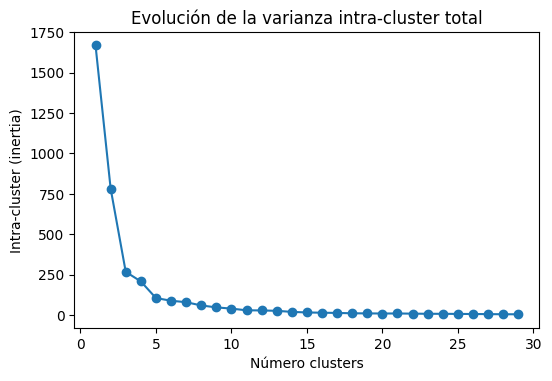

In [ ]:
# Implementación del método elbow para encontrar el número óptimo de clusters
range_n_clusters = range(1, 30)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(n_clusters=n_clusters,n_init='auto',random_state=8858)
    modelo_kmeans.fit(encoded_data_OHE)
    inertias.append(modelo_kmeans.inertia_)

# Visualización del método elbow
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)')

plt.show()

Viendo el gráfico decidimos que donde deja de decrecer la grafica es para n_clusters=5 por lo tanto usaremos eso a continuacion.

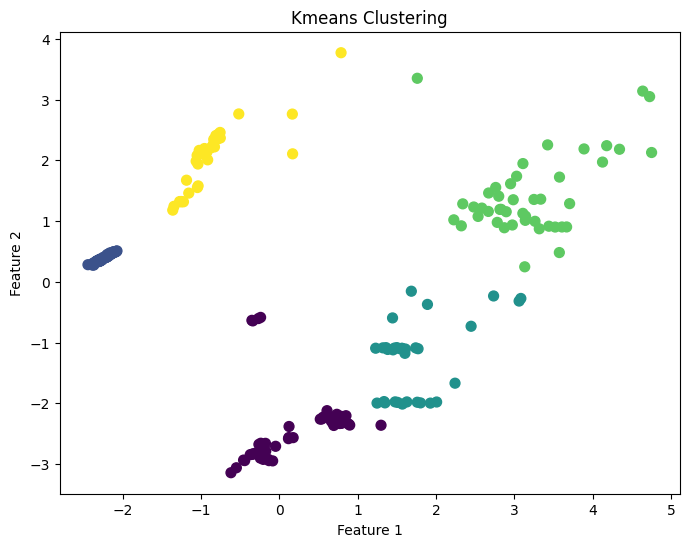

In [ ]:
kmeans = KMeans(n_clusters=5,n_init='auto',random_state=8858)

kmeans.fit(encoded_data_OHE)

prediccion=kmeans.predict(encoded_data_OHE)


plt.figure(figsize=(8, 6))
plt.scatter(encoded_data_OHE[0], encoded_data_OHE[1], c=prediccion, s=50, cmap='viridis')


plt.title('Kmeans Clustering')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

Con ordinales

Primero vamos ajustar el hiperparámetro n_clusters mediante el método del codo.

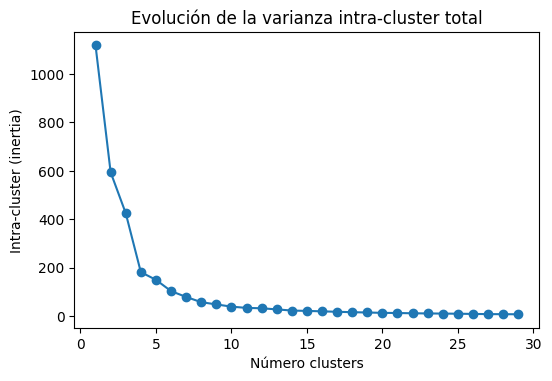

In [ ]:
# Implementación del método elbow para encontrar el número óptimo de clusters
range_n_clusters = range(1, 30)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(n_clusters=n_clusters,n_init='auto',random_state=8858)
    modelo_kmeans.fit(encoded_data_ordinal)
    inertias.append(modelo_kmeans.inertia_)

# Visualización del método elbow
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)')

plt.show()

Viendo el gráfico es dificil decidir ya que el 4 hay un primer codo pero luego no es del todo plano el decrecimiento. Sin ambargo por decision propia vamos a usar 4 clusters.

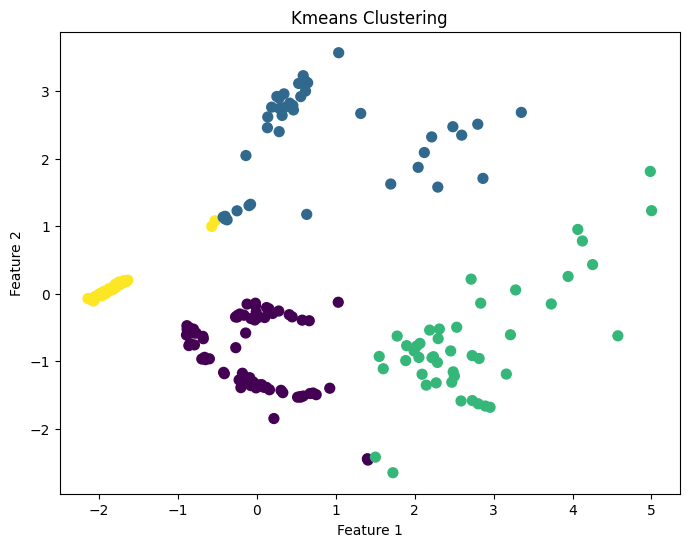

In [ ]:
kmeans = KMeans(n_clusters=4,n_init='auto',random_state=8858)

kmeans.fit(encoded_data_ordinal)

prediccion=kmeans.predict(encoded_data_ordinal)


plt.figure(figsize=(8, 6))
plt.scatter(encoded_data_ordinal[0], encoded_data_ordinal[1], c=prediccion, s=50, cmap='viridis')


plt.title('Kmeans Clustering')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

## 3.2 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
DBSCAN es un algoritmo de clustering que agrupa puntos en áreas de alta densidad. Usaremos para ello, la implementación de DBSCAN de scikit-learn.

Con OHE

Primero vamos ajustar el hiperparámetro eps mediante el método del codo.

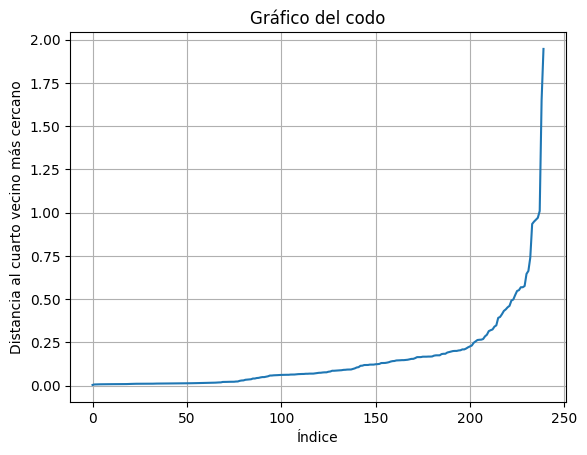

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.neighbors import NearestNeighbors

# Calcular la distancia al cuarto vecino más cercano para cada punto
neigh = NearestNeighbors(n_neighbors=4)
neigh.fit(encoded_data_OHE)
distances, _ = neigh.kneighbors(encoded_data_OHE)
distances = np.sort(distances[:,3])

# Plot de la curva de distancia vs. índice
plt.plot(distances)
plt.title('Gráfico del codo')
plt.xlabel('Índice')
plt.ylabel('Distancia al cuarto vecino más cercano')
plt.grid(True)
plt.show()

El punto a partor del cual hay un codo en la grafica podria ser 0.5, por lo tanto elegiremos ese como eps.

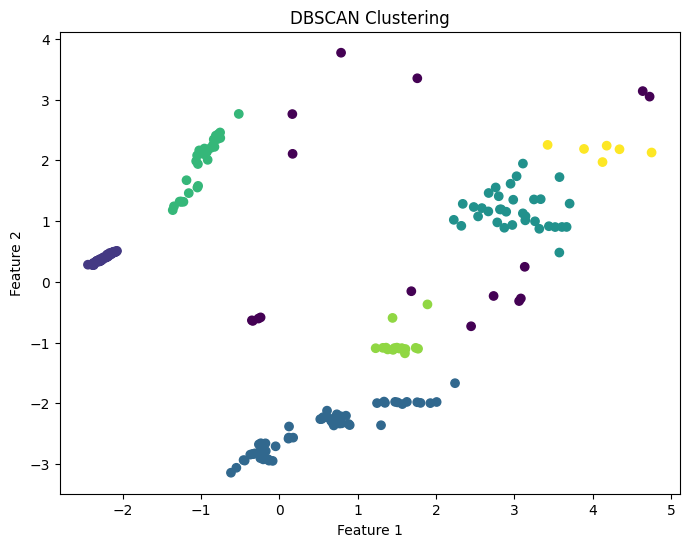

In [ ]:
from sklearn.cluster import DBSCAN

# Crear el objeto DBSCAN
dbscan_ohe = DBSCAN(eps=0.5, min_samples=5)

# Ajustar el modelo DBSCAN a los datos
dbscan_ohe.fit(encoded_data_OHE)

# Obtener las etiquetas de los clusters asignados por DBSCAN
labels_dbscan_ohe = dbscan_ohe.labels_

# Visualizar los clusters encontrados por DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data_OHE[0], encoded_data_OHE[1], c=labels_dbscan_ohe, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Con ordinales

Primero vamos ajustar el hiperparámetro eps mediante el método del codo.


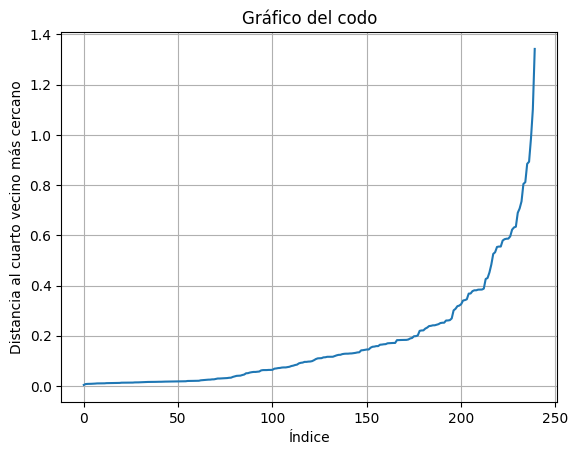

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.neighbors import NearestNeighbors

# Calcular la distancia al cuarto vecino más cercano para cada punto
neigh = NearestNeighbors(n_neighbors=4)
neigh.fit(encoded_data_ordinal)
distances, _ = neigh.kneighbors(encoded_data_ordinal)
distances = np.sort(distances[:,3])

# Plot de la curva de distancia vs. índice
plt.plot(distances)
plt.title('Gráfico del codo')
plt.xlabel('Índice')
plt.ylabel('Distancia al cuarto vecino más cercano')
plt.grid(True)
plt.show()

Esta vez la grafica indica un eps de 0.4 aprox. Es el que usaremos

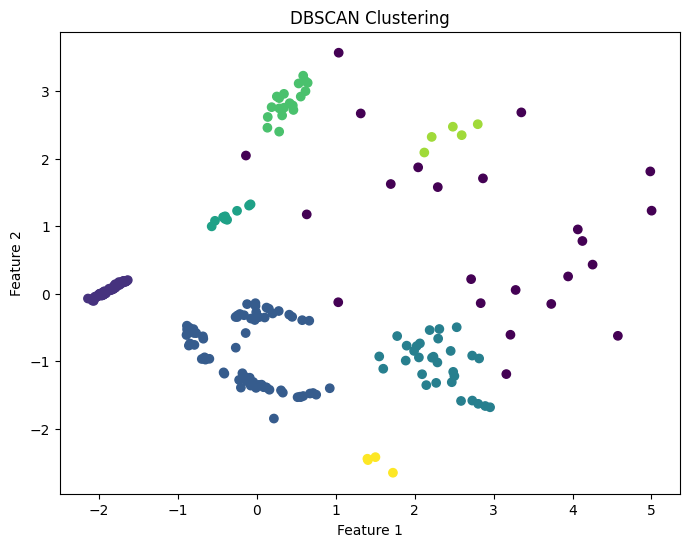

In [ ]:
from sklearn.cluster import DBSCAN

# Crear el objeto DBSCAN
dbscan_or = DBSCAN(eps=0.4, min_samples=4)

# Ajustar el modelo DBSCAN a los datos
dbscan_or.fit(encoded_data_ordinal)

# Obtener las etiquetas de los clusters asignados por DBSCAN
labels_dbscan_or = dbscan_or.labels_

# Visualizar los clusters encontrados por DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data_ordinal[0], encoded_data_ordinal[1], c=labels_dbscan_or, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

DBSCAN tiene la capacidad de identificar regiones de alta densidad en el espacio de características y asignar puntos que están lo suficientemente cerca a estos cúmulos como parte del cluster, mientras que los puntos que están aislados o no están suficientemente cerca de ningún cúmulo principal son etiquetados como ruido. Por ello, los puntos morados serian ruido.




K-means es un algoritmo de clustering que divide un conjunto de datos en un número fijo de clusters. Funciona iterativamente para asignar puntos de datos a los clusters cercanos y ajusta los centroides de los clusters en cada iteración. Es eficiente y ampliamente utilizado, pero puede ser sensible a la inicialización de los centroides y no es adecuado para clusters de formas y tamaños irregulares.

# 4. Elección del pipeline de clustering

Finalmente, elegimos como método de clustering el DBSCAN con one-hot encoding ya que al meter las nuevas variables categoricas. Elegimos DBSCAN porque nuestros datos no tienen la misma densidad ni estan distribuidos de forma definida. Además,elegimos one-hot encoding por el hecho de que como las variables categoricas no tienen orden (por ejemplo si fueran alto,bajo,medio). Al al ser colores y clases espectrales, es mejor utilizar los valores que se obtienen en el one-hot encoding, porque no hay ningun orden entre ellos y al usar ordinales podrías estas asignando un valor mas alto por ejemplo al rojo que al azul, y esto podría afectar a los calculos. Como con One-Hot Encoding simplemente se crea una columna con valor binario para cada dato no ocurre esto ya que no hay valor espefifico asignado a cada valor categórico.
Además en DbSCAN no hay que decirle el numero específico de clusters como es el caso de KMeans que es un hiperparametro. Por lo tanto como no sabemos el numero que debe salir se ha optado por dejar que el algoritmo decida el numero de clusters idoneo.

In [ ]:
import pandas as pd


# Convertir el array a DataFrame
labels_dbscan_ohe = pd.DataFrame(labels_dbscan_ohe)


# Mostrar el DataFrame resultante

print ("Clusters encontrados: ",labels_dbscan_ohe[0].unique())

Clusters encontrados:  [ 0  1  2  3 -1  4  5]


Comprobamos que se han creado 6 clusters y a continuacion añadimos una nueva columna a la tabla creada tras hacer OHE con la etiqueta correspondiente a cada dato. A continuación contamos cuantos datos hay de ruido y para cada cluster(el cluster -1 equivale a ruido).

In [ ]:

pre_encoded_data_OHE['cluster_label'] = labels_dbscan_ohe
conteo_por_cluster = pre_encoded_data_OHE['cluster_label'].value_counts()

# Mostrar el conteo por cluster
print(conteo_por_cluster)

cluster_label
 0    80
 1    58
 2    34
 3    30
-1    16
 4    16
 5     6
Name: count, dtype: int64


In [ ]:
pre_encoded_data_OHE

,Temperature,L,R,A_M,Color_blue,Color_blue-white,Color_orange,Color_orange-red,Color_pale yellow orange,Color_red,...,Color_white-yellow,Color_yellow,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O,cluster_label
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5
236,30839,834042.000000,1194.0000,-10.63,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-1
237,8829,537493.000000,1423.0000,-10.73,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,-1
238,9235,404940.000000,1112.0000,-11.23,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,4


# 5. Creacion de clusters y comparacion con Datos de Astronomía
A continuacion vamos a agrupar por la columna cluster_label que es la etiqueta de cluster y hacer la mediana para los datos de cada columna agrupada

In [ ]:
# Suponiendo que 'pre_encoded_data_OHE' es tu DataFrame que contiene los datos originales y la etiqueta de cluster
# y 'cluster_label' es la columna que contiene la etiqueta de cluster

# Agrupar los datos por la etiqueta del cluster y calcular la mediana para cada grupo
mediana_por_cluster = pre_encoded_data_OHE.groupby('cluster_label').median()

# Mostrar la mediana por cluster
print(mediana_por_cluster)


               Temperature              L           R     A_M  Color_blue  \
cluster_label                                                               
-1                  7839.5  265245.000000  1164.25000  -8.145         0.0   
 0                  3154.0       0.000915     0.15710  15.495         0.0   
 1                 11845.0       0.814500     0.94500   5.040         0.0   
 2                 19328.5  237000.000000    51.50000  -6.105         1.0   
 3                  3587.5  200000.000000  1272.00000  -8.690         0.0   
 4                 18105.0       0.001330     0.01185  11.430         1.0   
 5                 38058.0  561860.000000   724.00000  -7.573         1.0   

               Color_blue-white  Color_orange  Color_orange-red  \
cluster_label                                                     
-1                          0.0           0.0               0.0   
 0                          0.0           0.0               0.0   
 1                          1.0       

Imprimimos el Dataframe que ya permite ver cosas sin ambargo ahora hay que deshacer el One-Hot encoding

In [ ]:
mediana_por_cluster

,Temperature,L,R,A_M,Color_blue,Color_blue-white,Color_orange,Color_orange-red,Color_pale yellow orange,Color_red,Color_white,Color_white-yellow,Color_yellow,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
cluster_label,,,,,,,,,,,,,,,,,,,,
-1,7839.5,265245.000000,1164.25000,-8.145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,3154.0,0.000915,0.15710,15.495,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,11845.0,0.814500,0.94500,5.040,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19328.5,237000.000000,51.50000,-6.105,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3587.5,200000.000000,1272.00000,-8.690,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,18105.0,0.001330,0.01185,11.430,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,38058.0,561860.000000,724.00000,-7.573,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
import pandas as pd

# Supongamos que tienes un DataFrame codificado en one-hot encoding llamado mediana_por_cluster
# y la columna 'cluster_label' contiene las etiquetas de los clusters
# Aquí está el DataFrame de muestra:


# Obtener las columnas de características codificadas en one-hot encoding
columnas_categoricas = mediana_por_cluster.columns[mediana_por_cluster.columns.str.startswith('Color_')]

# Revertir el one-hot encoding seleccionando la categoría con el valor más alto en cada fila
categorias_originales = mediana_por_cluster[columnas_categoricas].idxmax(axis=1).str.replace('Color_', '')

# Asignar un nombre a la nueva columna
categorias_originales.name = 'Color'

# Agregar las columnas numéricas al DataFrame
df_revertido = pd.concat([mediana_por_cluster.drop(columns=columnas_categoricas), categorias_originales], axis=1)

print(df_revertido)



               Temperature              L           R     A_M  \
cluster_label                                                   
-1                  7839.5  265245.000000  1164.25000  -8.145   
 0                  3154.0       0.000915     0.15710  15.495   
 1                 11845.0       0.814500     0.94500   5.040   
 2                 19328.5  237000.000000    51.50000  -6.105   
 3                  3587.5  200000.000000  1272.00000  -8.690   
 4                 18105.0       0.001330     0.01185  11.430   
 5                 38058.0  561860.000000   724.00000  -7.573   

               Spectral_Class_A  Spectral_Class_B  Spectral_Class_F  \
cluster_label                                                         
-1                          0.0               0.0               0.0   
 0                          0.0               0.0               0.0   
 1                          0.0               0.0               0.0   
 2                          0.0               0.0          

In [ ]:
df_revertido

,Temperature,L,R,A_M,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O,0
cluster_label,,,,,,,,,,,,
-1,7839.5,265245.000000,1164.25000,-8.145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blue
0,3154.0,0.000915,0.15710,15.495,0.0,0.0,0.0,0.0,0.0,1.0,0.0,red
1,11845.0,0.814500,0.94500,5.040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blue-white
2,19328.5,237000.000000,51.50000,-6.105,0.0,0.0,0.0,0.0,0.0,0.0,1.0,blue
3,3587.5,200000.000000,1272.00000,-8.690,0.0,0.0,0.0,0.0,0.0,1.0,0.0,red
4,18105.0,0.001330,0.01185,11.430,0.0,1.0,0.0,0.0,0.0,0.0,0.0,blue
5,38058.0,561860.000000,724.00000,-7.573,0.0,0.0,0.0,0.0,0.0,0.0,1.0,blue


In [ ]:
import pandas as pd

# Supongamos que tienes un DataFrame codificado en one-hot encoding llamado mediana_por_cluster
# y la columna 'cluster_label' contiene las etiquetas de los clusters
# Aquí está el DataFrame de muestra:


# Obtener las columnas de características codificadas en one-hot encoding
columnas_categoricas = df_revertido.columns[df_revertido.columns.str.startswith('Spectral_Class_')]

# Revertir el one-hot encoding seleccionando la categoría con el valor más alto en cada fila
categorias_originales = df_revertido[columnas_categoricas].idxmax(axis=1).str.replace('Spectral_Class_', '')
categorias_originales.name = 'Spectral_Class'
# Agregar las columnas numéricas al DataFrame
df_revertido_final = pd.concat([df_revertido.drop(columns=columnas_categoricas), categorias_originales], axis=1)

print(df_revertido_final)


               Temperature              L           R     A_M       Color  \
cluster_label                                                               
-1                  7839.5  265245.000000  1164.25000  -8.145        blue   
 0                  3154.0       0.000915     0.15710  15.495         red   
 1                 11845.0       0.814500     0.94500   5.040  blue-white   
 2                 19328.5  237000.000000    51.50000  -6.105        blue   
 3                  3587.5  200000.000000  1272.00000  -8.690         red   
 4                 18105.0       0.001330     0.01185  11.430        blue   
 5                 38058.0  561860.000000   724.00000  -7.573        blue   

              Spectral_Class  
cluster_label                 
-1                         A  
 0                         M  
 1                         A  
 2                         O  
 3                         M  
 4                         B  
 5                         O  


In [ ]:
df_revertido_final

,Temperature,L,R,A_M,Color,Spectral_Class
cluster_label,,,,,,
-1,7839.5,265245.000000,1164.25000,-8.145,blue,A
0,3154.0,0.000915,0.15710,15.495,red,M
1,11845.0,0.814500,0.94500,5.040,blue-white,A
2,19328.5,237000.000000,51.50000,-6.105,blue,O
3,3587.5,200000.000000,1272.00000,-8.690,red,M
4,18105.0,0.001330,0.01185,11.430,blue,B
5,38058.0,561860.000000,724.00000,-7.573,blue,O


Como comnetarios finales decir que en comparacion con la organizacion que la astronomía utiliza habitualmente son similares. Tambien se tienen 6 clusters y mas o menos. Dentro de lo esperado. Cabe destacar que las variables categoricas casi seguro estan del todo erroneas ya aue al hacer la mediana de una variable en formato One-Hot encoding puede no tener sentido ya que todos los valores son o 0 o 1.